In [1]:
import matplotlib
import networkx as nx
import pandas as pd
import seaborn as sbn
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

import api

In [2]:
%matplotlib inline

In [3]:
FIGSIZE = (6, 4)
FIGSIZE=(10,6)

In [4]:
cd = {
    'b': '#1f77b4',
    'o': '#ff7f0e',
    'g': '#2ca02c',
    'r': '#d62728',
    'w': '#d627f8',
}

In [5]:
g_nlg = nx.read_gexf('out/elbulli_nlg_02.gexf')

In [6]:
recipes_info_df = pd.read_csv('out/recipes_info.csv')

In [7]:
recipes_data_df = pd.read_csv('out/recipes_data.csv')

In [8]:
recipes_df = pd.concat([recipes_info_df, recipes_data_df], axis=1)

In [9]:
mean_by_year_df = recipes_df.groupby('year').mean()

In [10]:
lang_cols = [
    'num_ingredients',
    'num_techniques',
#     'num_preparations',
    'num_recipes',
]

In [11]:
ingr_cols = [c for c in recipes_df if c.startswith('i_')]
tech_cols = [c for c in recipes_df if c.startswith('t_')]

In [12]:
count_ingr_by_year_sr = recipes_df.groupby('year')[ingr_cols].max().apply(sum, axis=1)
count_tech_by_year_sr = recipes_df.groupby('year')[tech_cols].max().apply(sum, axis=1)
# count_prep_by_year_sr = pd.Series([0] * len(recipes_df.year.unique()), index=recipes_df.year.unique())
# for year in recipes_df.year.unique():
#     preps = set()
#     df = recipes_df[recipes_df.year == year]
#     for i in df.index:
#         n = str(i + 1)
#         preps_nlg = api.get_Preparations_Recipe(g_nlg, n)
#         preps = preps.union(preps_nlg)
#     count_prep_by_year_sr[year] = len(preps)
count_recip_by_year_sr = recipes_df.groupby('year')['title'].count()

In [13]:
count_recip_by_year_sr.name

'title'

In [14]:
count_lang_by_year_df = pd.concat([
        count_ingr_by_year_sr,
        count_tech_by_year_sr,
#         count_prep_by_year_sr,
        count_recip_by_year_sr,
    ],
    axis=1,
)
count_lang_by_year_df.columns = lang_cols

In [15]:
count_lang_by_year_df

,num_ingredients,num_techniques,num_recipes
year,,,
1987,129,65,15
1988,210,71,26
1989,218,83,28
1990,268,93,32
1991,369,101,57
1992,301,94,38
1993,263,89,30
1994,391,112,60
1995,367,114,51


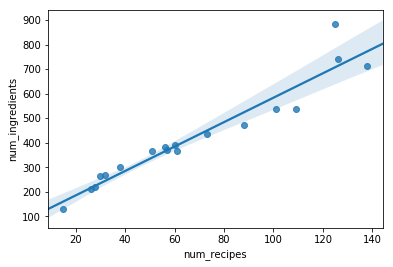

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

# sns.set(font_scale=2)
# plt.figure(figsize=(16,10))
sns.regplot(x='num_recipes', y='num_ingredients', data=count_lang_by_year_df);

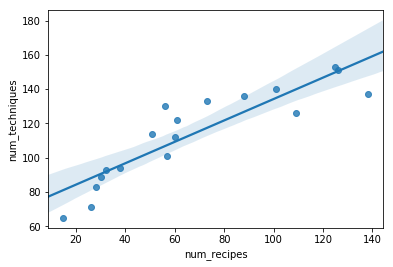

In [17]:
import seaborn as sns

# sns.set(font_scale=2)
# plt.figure(figsize=FIGSIZE)
ax = sns.regplot(x='num_recipes', y='num_techniques', data=count_lang_by_year_df)
# ax.set_xlabel('Tested year', fontsize=14)
# ax.set_ylabel('Predicted year', fontsize=14);

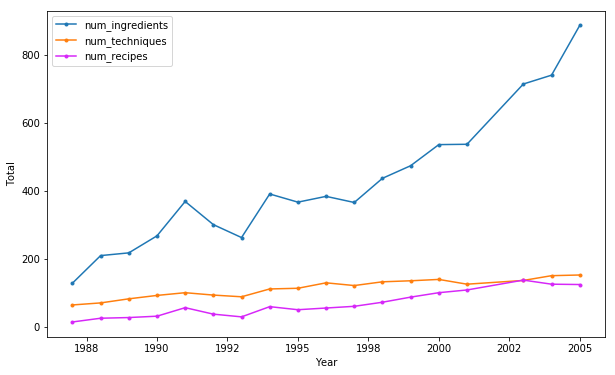

In [18]:
ax = count_lang_by_year_df.plot(
    figsize=FIGSIZE,
#     title = 'Total number of ingredients, techniques, and recipes\nper year',
    marker='.',
    color=[cd['b'], cd['o'], cd['w']],
#     logy=True,
)
ax.set_xlabel('Year')
ax.set_ylabel('Total')
# ax.xaxis.set_major_locator(MaxNLocator(integer=True));
# ax.yaxis.set_major_locator(MaxNLocator(integer=True));
# ax.get_yaxis().set_major_formatter(FormatStrFormatter('%.0f'))
ax.get_xaxis().set_major_formatter(FormatStrFormatter('%.0f'))

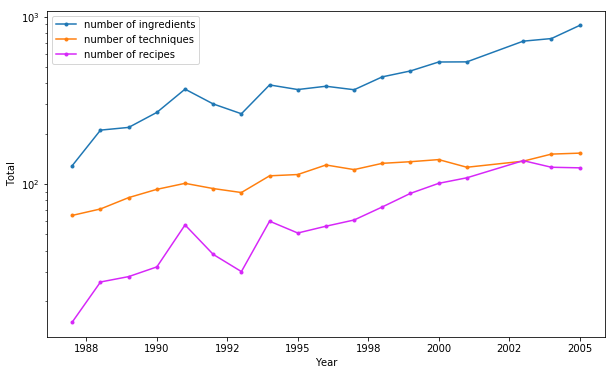

In [35]:
ax = count_lang_by_year_df.plot(
    figsize=FIGSIZE,
#     title = 'Total number of ingredients, techniques, and recipes\nper year',
    marker='.',
    color=[cd['b'], cd['o'], cd['w']],
    logy=True,
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['number of ingredients', 'number of techniques', 'number of recipes'])
ax.set_xlabel('Year')
ax.set_ylabel('Total')
# ax.xaxis.set_major_locator(MaxNLocator(integer=True));
# ax.yaxis.set_major_locator(MaxNLocator(integer=True));
# ax.get_yaxis().set_major_formatter(FormatStrFormatter('%.0f'))
ax.get_xaxis().set_major_formatter(FormatStrFormatter('%.0f'))

In [20]:
top_metr_cols = [
    'num_ingredients',
    'num_techniques',
#     'num_worlds',
    'num_preparations',
]

In [21]:
count_recip_by_year_sr.name = 'total num_recipes'
mean_metrics_by_year_df = mean_by_year_df[top_metr_cols]
mean_metrics_by_year_df.columns = ['avg num_ingredients',
    'avg num_techniques',
#     'num_worlds',
    'avg num_preparations',]
aux_df = pd.concat([mean_metrics_by_year_df, count_recip_by_year_sr], axis=1)

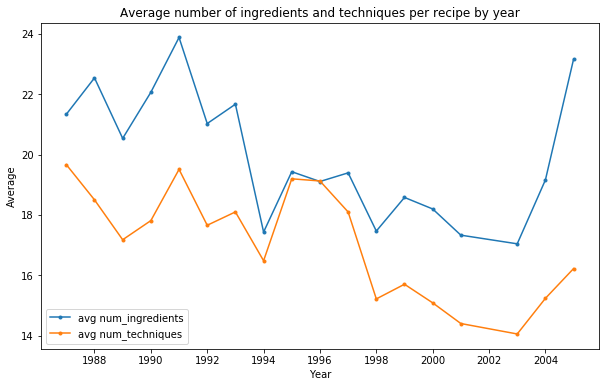

In [22]:
ax = aux_df[['avg num_ingredients', 'avg num_techniques']].plot(
    figsize=FIGSIZE,
    title = 'Average number of ingredients and techniques per recipe by year',
    marker='.',
    color=[cd['b'], cd['o'], cd['g'], cd['w']],
#     logy=True,
)
ax.set_xlabel('Year')
ax.set_ylabel('Average')
# ax.yaxis.set_major_locator(MaxNLocator(integer=True));
# ax.get_xaxis().get_major_formatter().set_useOffset(False);
# ax.get_yaxis().set_major_formatter(FormatStrFormatter('%.0f'));
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

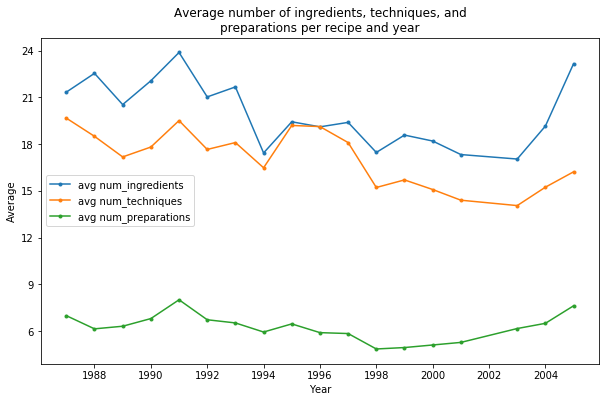

In [23]:
ax = mean_metrics_by_year_df.plot(
    figsize=FIGSIZE,
    title = 'Average number of ingredients, techniques, and\npreparations per recipe and year',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Average')
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

Conclusions:<br>
There are peaks in 1991 and 2005. Therefore, these metrics do not explain the creativity increase on their own.

In [24]:
worlds_cols = [
    'w_SALADO',
    'w_DULCE',
]

In [25]:
mean_by_year_df[top_metr_cols]

,num_ingredients,num_techniques,num_preparations
year,,,
1987,21.333333,19.666667,7.000000
1988,22.538462,18.500000,6.153846
1989,20.535714,17.178571,6.321429
1990,22.062500,17.812500,6.812500
1991,23.877193,19.508772,8.017544
1992,21.026316,17.657895,6.736842
1993,21.666667,18.100000,6.533333
1994,17.433333,16.483333,5.950000
1995,19.431373,19.196078,6.470588


In [26]:
mean_worlds_by_year_df = mean_by_year_df[worlds_cols+['num_preparations']]

In [27]:
mean_worlds_by_year_df

,w_SALADO,w_DULCE,num_preparations
year,,,
1987,2.533333,0.000000,7.000000
1988,2.153846,0.307692,6.153846
1989,1.821429,0.642857,6.321429
1990,1.718750,1.031250,6.812500
1991,1.982456,0.807018,8.017544
1992,2.026316,0.421053,6.736842
1993,1.733333,1.233333,6.533333
1994,1.833333,1.166667,5.950000
1995,1.941176,1.411765,6.470588


In [28]:
mean_worlds_by_year_df2 = pd.DataFrame()
mean_worlds_by_year_df2['w_SALADO'] = mean_worlds_by_year_df.apply(
    lambda x: x.num_preparations / (x.w_SALADO + x.w_DULCE) *  x.w_SALADO, axis=1)
mean_worlds_by_year_df2['w_DULCE'] = mean_worlds_by_year_df.apply(
    lambda x: x.num_preparations / (x.w_SALADO + x.w_DULCE) *  x.w_DULCE, axis=1)
mean_worlds_by_year_df2['num_preparations'] = mean_worlds_by_year_df['num_preparations']

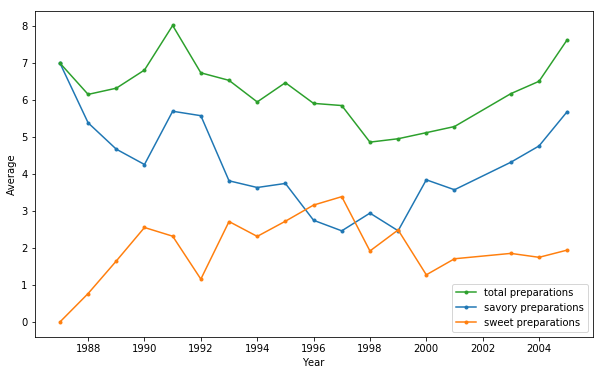

In [36]:
ax = mean_worlds_by_year_df2.plot(
    figsize=FIGSIZE,
#     title = 'Average number of preparations by world\nper recipe and year',
    marker='.',
)
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[2]]+handles[:2], ['total preparations', 'savory preparations', 'sweet preparations'])
ax.set_xlabel('Year')
ax.set_ylabel('Average');
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

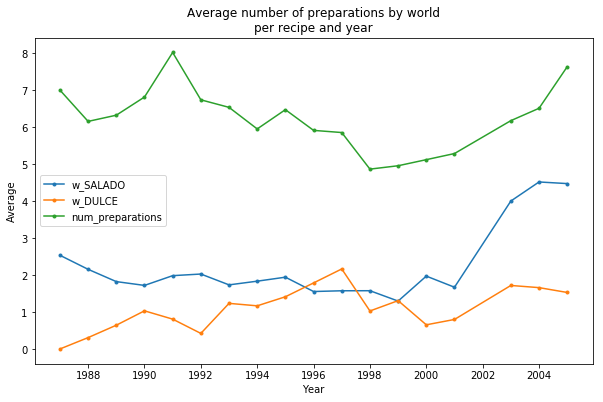

In [37]:
ax = mean_worlds_by_year_df.plot(
    figsize=FIGSIZE,
    title = 'Average number of preparations by world\nper recipe and year',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Average');
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

In [38]:
top_sweet_ingredients = [
    'i_azúcar',
    'i_glucosa',
    'i_isomalt',
]

In [39]:
mean_top_sweet_ingredients_by_year_df = mean_by_year_df[top_sweet_ingredients] * 100

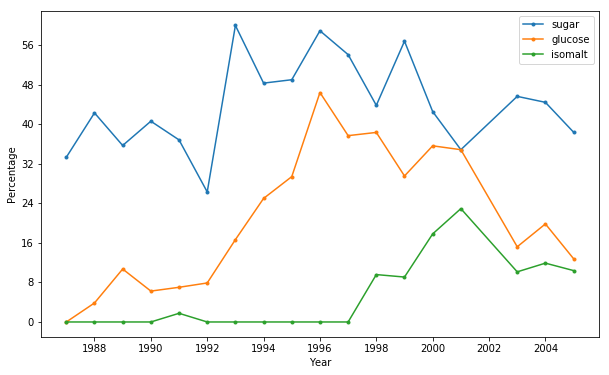

In [41]:
ax = mean_top_sweet_ingredients_by_year_df.plot(
    figsize=FIGSIZE,
#     title = 'Percentage of recipes containing the top sweet ingredients by year',
    marker='.',
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['sugar', 'glucose', 'isomalt'])
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

In [42]:
top_savory_ingredients = [
    'i_sal',
    'i_sal maldon',
]

In [43]:
mean_top_savory_ingredients_by_year_df = mean_by_year_df[top_savory_ingredients] * 100

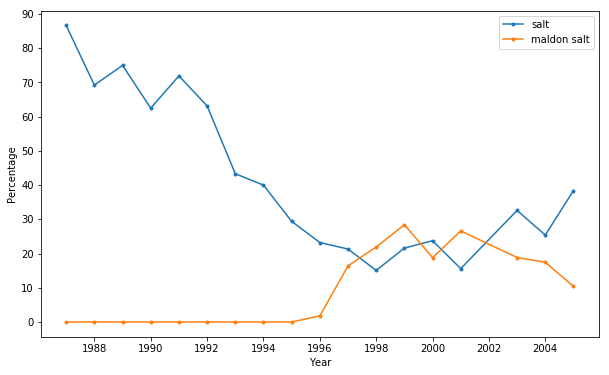

In [45]:
ax = mean_top_savory_ingredients_by_year_df.plot(
    figsize=FIGSIZE,
#     title = 'Percentage of recipes containing the top savory ingredients by year',
    marker='.',
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['salt', 'maldon salt'])
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

In [46]:
top_other_ingredients = [
    'i_agar',
    'i_agua',
    'i_agar-agar en polvo',
#     'i_azúcar',
#     'i_sal',
    'i_hoja de gelatina',
    'i_perifollo',
    'i_aceite de oliva',
#     'i_sal maldon',
#     'i_glucosa',
#     'i_nata líquida',
#     'i_mantequilla',
#     'i_aceite',
#     'i_cebollino fresco',
#     'i_aceite de girasol',
#     'i_nata',
#     'i_harina de trigo',
#     'i_limón',
#     'i_claras de huevo',
#     'i_isomalt',
]

In [47]:
top_other_ingredients2 = [
    'i_agar',
    'i_agua',
#     'i_agar-agar en polvo',
#     'i_azúcar',
#     'i_sal',
    'i_hoja de gelatina',
    'i_perifollo',
    'i_aceite de oliva',
#     'i_sal maldon',
#     'i_glucosa',
#     'i_nata líquida',
#     'i_mantequilla',
#     'i_aceite',
#     'i_cebollino fresco',
#     'i_aceite de girasol',
#     'i_nata',
#     'i_harina de trigo',
#     'i_limón',
#     'i_claras de huevo',
#     'i_isomalt',
]

In [48]:
mean_top_other_ingredients_by_year_df = mean_by_year_df[top_other_ingredients] * 100

In [49]:
mean_top_other_ingredients_by_year_df2 = mean_top_other_ingredients_by_year_df
mean_top_other_ingredients_by_year_df2['i_agar'] = \
    mean_top_other_ingredients_by_year_df.apply(lambda x: max(x['i_agar'], x['i_agar-agar en polvo']), axis=1)


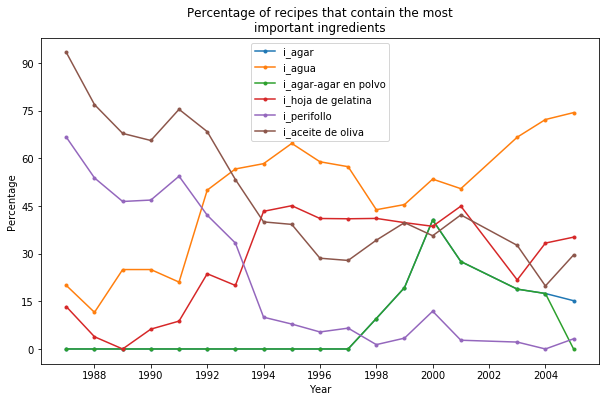

In [50]:
ax = mean_top_other_ingredients_by_year_df.plot(
    figsize=FIGSIZE,
    title = 'Percentage of recipes that contain the most\nimportant ingredients',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

In [51]:
mean_top_other_ingredients_by_year_df2 = mean_top_other_ingredients_by_year_df2[top_other_ingredients2]

In [52]:
FIGSIZE=(10,6)

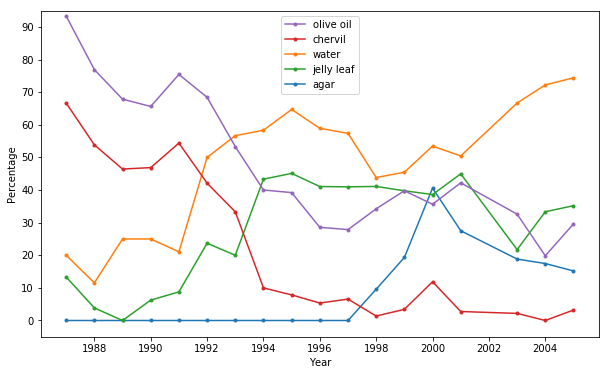

In [75]:
ax = mean_top_other_ingredients_by_year_df2.plot(
    figsize=FIGSIZE,
#     title = 'Percentage of recipes containing the top ingredients by year',
    marker='.',
    ylim=(-5,95)
)
handles, labels = ax.get_legend_handles_labels()
new_h = [handles[4]]+[handles[3]]+[handles[1]]+[handles[2]]+[handles[0]]
new_l = ['olive oil', 'chervil', 'water', 'jelly leaf', 'agar']
ax.legend(new_h, new_l)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

In [76]:
oils_sr = pd.Series()
for ingr in ingr_cols:
    if 'aceite' in ingr:
        oils_sr[ingr] = recipes_df[ingr].sum()

In [77]:
oils_sr.sort_values(ascending=False)

i_aceite de oliva                                            485
i_aceite de girasol                                          261
i_aceite                                                     220
i_aceite de oliva virgen                                      61
i_aceite de oliva virgen extra                                46
i_aceite de ajo                                               19
i_aceite de trufa negra                                       18
i_aceite de ceps                                              18
i_aceite de sésamo                                            16
i_aceite de guindilla                                         12
i_aceite de jengibre                                          12
i_aceite de tartufo                                           10
i_aceite de almendra                                          10
i_aceite de albahaca                                          10
i_aceite de trufa blanca                                       9
i_aceite de pipas de cala

In [78]:
top_oils = [
    'i_aceite de oliva',
#     'i_aceite de girasol',
#     'i_aceite',
    'i_aceite de oliva virgen',
    'i_aceite de oliva virgen extra',
]

In [79]:
mean_top_oils_by_year_df = mean_by_year_df[top_oils] * 100

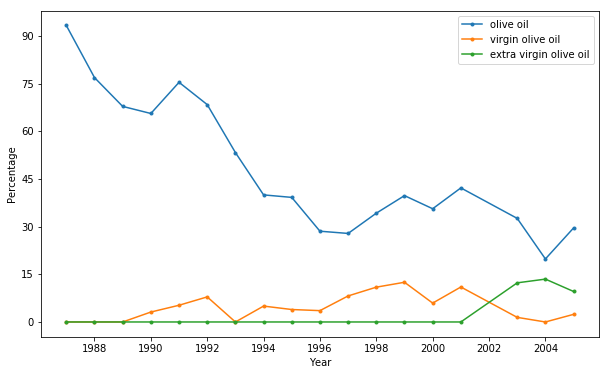

In [81]:
ax = mean_top_oils_by_year_df.plot(
    figsize=FIGSIZE,
#     title = 'Percentage of recipes that contain the different types\nof olive oil',
    marker='.',
)
handles, labels = ax.get_legend_handles_labels()
new_l = ['olive oil', 'virgin olive oil', 'extra virgin olive oil']
ax.legend(handles, new_l)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

Conclusions:<br>
Description of the graphics. (Importance in terms of prediction.)

In [82]:
top_techniques = [
    't_hervir',
    't_pasar',
    't_cocer',
    't_horno',
    't_triturar',
#     't_mezclar',
#     't_estirar',
#     't_reposar',
#     't_pelar',
#     't_colar',
#     't_secar',
#     't_escurrir',
#     't_disolver',
#     't_escaldar',
#     't_sal',
#     't_puré',
#     't_agua',
#     't_sartén',
#     't_espuma',
#     't_montar',
]

In [83]:
mean_top_techniques_by_year_df = mean_by_year_df[top_techniques] * 100

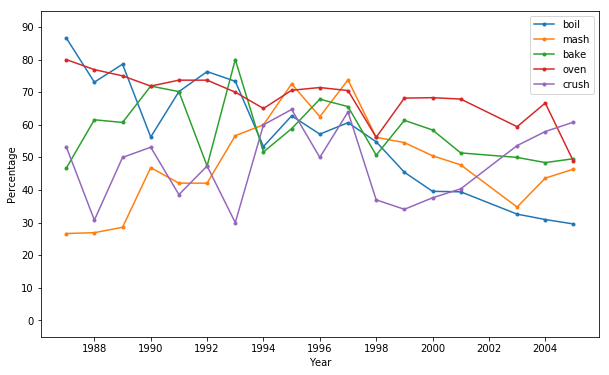

In [87]:
ax = mean_top_techniques_by_year_df.plot(
    figsize=FIGSIZE,
#     title = 'Percentage of recipes using the top techniques by year',
    marker='.',
    ylim=(-5, 95)
)
handles, labels = ax.get_legend_handles_labels()
new_l = ['boil', 'mash', 'bake', 'oven', 'crush']
ax.legend(handles, new_l)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

Conclusions:<br>
Description of the graphics. (Importance in terms of prediction.)